In [109]:
import import_ipynb
import importlib
import framingham_data
importlib.reload(framingham_data)


importing Jupyter notebook from framingham_data.ipynb
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


<module 'framingham_data' from 'framingham_data.ipynb'>

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from time import perf_counter
from sklearn.model_selection import StratifiedKFold, learning_curve
import numpy as np
%matplotlib inline

In [106]:
#function used for finding best score on hyperparameter tuning
def best_score(scores, SCORE_TYPE):
    best = {key: {"label":"", "score":0} for key in SCORE_TYPE}    
    for i in range(len(scores)):
        for s in SCORE_TYPE:
            if scores[i]['scores'][s] > best[s]["score"]:
                best[s]["label"] = scores[i]['label']
                best[s]["score"] = scores[i]['scores'][s]
    return best
        

In [110]:
#load data with oversampling
X_train, y_train, X_test, y_test = framingham_data.load(oversample=True, verbose=True)
SCORE_TYPE = ["accuracy", "f1", "precision","recall"]

Loading 4133 rows
split: Train:  2893 2893 Test:  1240 1240
after resample
split: Train:  4926 4926 Test:  1240 1240


In [87]:
'''
      _           _     _               _______                 
     | |         (_)   (_)             |__   __|                
   __| | ___  ___ _ ___ _  ___  _ __      | |_ __ ___  ___  ___ 
  / _` |/ _ \/ __| / __| |/ _ \| '_ \     | | '__/ _ \/ _ \/ __|
 | (_| |  __/ (__| \__ \ | (_) | | | |    | | | |  __/  __/\__ \
  \__,_|\___|\___|_|___/_|\___/|_| |_|    |_|_|  \___|\___||___/
                                                                
'''
#first create decision tree with varying depth
scores = []
for i in range(1,40):
    clf = DecisionTreeClassifier(
        random_state=42,
        max_depth = i,
        criterion="entropy"
    )
    scores.append({
        "label":f'max_depth_{i}',
        "scores":{},
        "times":{}
    })
    for s in SCORE_TYPE:
        t = perf_counter()
        scores[-1]["scores"][s] = sum(cross_val_score(clf, X_train, y_train,scoring=s, cv=10, n_jobs=6))/10
        scores[-1]["times"][s] = perf_counter() - t


In [88]:
max_depth_scores = scores
print(best_score(max_depth_scores, SCORE_TYPE))
max_depth_scores

{'accuracy': {'label': 'max_depth_25', 'score': 0.9279349923316677}, 'f1': {'label': 'max_depth_25', 'score': 0.9328685288539992}, 'precision': {'label': 'max_depth_25', 'score': 0.8743086795443535}, 'recall': {'label': 'max_depth_24', 'score': 1.0}}


[{'label': 'max_depth_1',
  'scores': {'accuracy': 0.6510381107867873,
   'f1': 0.70485943299695,
   'precision': 0.6107521423761806,
   'recall': 0.8335374082485764},
  'times': {'accuracy': 0.062355151982046664,
   'f1': 0.04293140198569745,
   'precision': 0.04433753795456141,
   'recall': 0.040876489016227424}},
 {'label': 'max_depth_2',
  'scores': {'accuracy': 0.6510381107867873,
   'f1': 0.70485943299695,
   'precision': 0.6107521423761806,
   'recall': 0.8335374082485764},
  'times': {'accuracy': 0.047344128019176424,
   'f1': 0.04558851302135736,
   'precision': 0.4223204100271687,
   'recall': 0.04483943700324744}},
 {'label': 'max_depth_3',
  'scores': {'accuracy': 0.6500103068982008,
   'f1': 0.6585768759662144,
   'precision': 0.6461396033309194,
   'recall': 0.6921283038741318},
  'times': {'accuracy': 0.03765593399293721,
   'f1': 0.04819561401382089,
   'precision': 0.047909063985571265,
   'recall': 0.04141517204698175}},
 {'label': 'max_depth_4',
  'scores': {'accurac

In [91]:
#max features
scores = []
for i in range(1,20):
    clf = DecisionTreeClassifier(
        random_state=42,
        criterion="entropy",
        max_features=i,
        max_depth=25
    )
    scores.append({
        "label":f'max_features_{i}',
        "scores":{},
        "times":{}
    })
    for s in SCORE_TYPE:
        t = perf_counter()
        scores[-1]["scores"][s] = sum(cross_val_score(clf, X_train, y_train,scoring=s, cv=10, n_jobs=6))/10
        scores[-1]["times"][s] = perf_counter() - t

In [92]:
max_features_scores = scores
print(best_score(max_features_scores, SCORE_TYPE))
max_features_scores

{'accuracy': {'label': 'max_features_6', 'score': 0.9301608700671185}, 'f1': {'label': 'max_features_6', 'score': 0.9347577464867524}, 'precision': {'label': 'max_features_6', 'score': 0.8782846731228531}, 'recall': {'label': 'max_features_8', 'score': 1.0}}


[{'label': 'max_features_1',
  'scores': {'accuracy': 0.9187911245238214,
   'f1': 0.9244773854262286,
   'precision': 0.864474019140449,
   'recall': 0.993497580724795},
  'times': {'accuracy': 0.04607494699303061,
   'f1': 0.04224796802736819,
   'precision': 0.04096494195982814,
   'recall': 0.0390337040880695}},
 {'label': 'max_features_2',
  'scores': {'accuracy': 0.9175802701231882,
   'f1': 0.9237719204310147,
   'precision': 0.8599439215934674,
   'recall': 0.9979674796747968},
  'times': {'accuracy': 0.04313891695346683,
   'f1': 0.03987019299529493,
   'precision': 0.040095032076351345,
   'recall': 0.04196627205237746}},
 {'label': 'max_features_3',
  'scores': {'accuracy': 0.9212276752584971,
   'f1': 0.9268713557172159,
   'precision': 0.867368002849868,
   'recall': 0.995528455284553},
  'times': {'accuracy': 0.044274613028392196,
   'f1': 0.04079315101262182,
   'precision': 0.048090447089634836,
   'recall': 0.04184833902399987}},
 {'label': 'max_features_4',
  'scores'

Loading 4133 rows
split: Train:  2893 2893 Test:  1240 1240
after resample
split: Train:  4926 4926 Test:  1240 1240


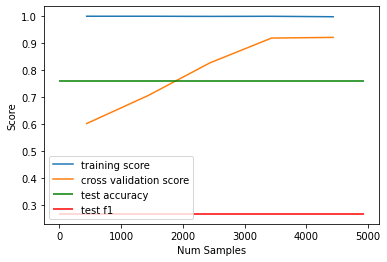

In [93]:
#print the results (used for graphing as well)
X_train, y_train, X_test, y_test = framingham_data.load(oversample=True, verbose=True, scale_type="ss")

estimator = DecisionTreeClassifier(
        random_state=42,
        max_depth=25,
        criterion="entropy",
        max_features=6
    )
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_train, y_train, cv=10,return_times=True)
plt.plot(train_sizes,np.mean(train_scores,axis=1), label="training score")
plt.plot(train_sizes,np.mean(test_scores,axis=1), label="cross validation score")
plt.xlabel("Num Samples")
plt.ylabel("Score")


estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
plt.hlines(y=metrics.accuracy_score(y_test, y_pred), color='green', xmin=0, xmax = len(X_train), label="test accuracy")
plt.hlines(y=metrics.f1_score(y_test, y_pred), color='red', xmin=0, xmax = len(X_train), label="test f1")
# plt.plot(y_pred, label="cross validation score")
plt.legend(loc="best")

In [79]:
#test set on best
t = perf_counter()
best_depth = 23
clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=best_depth,
    criterion="entropy",
    max_features=5
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))
print(perf_counter() - t)

Accuracy: 0.7467741935483871
Precision: 0.19791666666666666
f1: 0.19487179487179487
0.01628509198781103


In [80]:
'''
  _                     _   
 | |                   | |  
 | |__   ___   ___  ___| |_ 
 | '_ \ / _ \ / _ \/ __| __|
 | |_) | (_) | (_) \__ \ |_ 
 |_.__/ \___/ \___/|___/\__|
                            
                            
'''
from sklearn.ensemble import AdaBoostClassifier
X_train, y_train, X_test, y_test = framingham_data.load(oversample=True, verbose=True, scale_type="standard")


Loading 4133 rows
split: Train:  2893 2893 Test:  1240 1240
after resample
split: Train:  4926 4926 Test:  1240 1240


In [105]:
# scores = []
# for i in range(10):
#     base = DecisionTreeClassifier(max_depth=1, criterion="entropy")
#     model = AdaBoostClassifier(base_estimator=base)
#     scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=5)

#different starting estimators (weak learners, all 1 depth)
scores = []
SCORE_TYPE = ["accuracy", 'f1']

for i in range(1,110,10):
    base = DecisionTreeClassifier(max_depth=1, criterion="entropy")
    model = AdaBoostClassifier(base_estimator=base,  n_estimators=(i * 50))
    scores.append({
        "label":f'n_estimators_{i*50}',
        "scores":{},
        "times":{}
    })
    for s in SCORE_TYPE:
        t = perf_counter()
        scores[-1]["scores"][s] = sum(cross_val_score(model, X_train, y_train, scoring=s, cv=10, n_jobs=6))/10
        scores[-1]["times"][s] = perf_counter() - t

In [369]:
boost_n_estimators = scores
print(best_score(boost_n_estimators, SCORE_TYPE))
boost_n_estimators

{'accuracy': {'label': 'n_estimators_5050', 'score': 0.8213530071406192}}


[{'label': 'n_estimators_50',
  'scores': {'accuracy': 0.6936719767806199},
  'times': {'accuracy': 1.5081277290009893}},
 {'label': 'n_estimators_550',
  'scores': {'accuracy': 0.7578171638714359},
  'times': {'accuracy': 4.7589551719720475}},
 {'label': 'n_estimators_1050',
  'scores': {'accuracy': 0.7724286350368574},
  'times': {'accuracy': 9.259143501985818}},
 {'label': 'n_estimators_1550',
  'scores': {'accuracy': 0.7807516614719899},
  'times': {'accuracy': 13.434867203002796}},
 {'label': 'n_estimators_2050',
  'scores': {'accuracy': 0.7900905357937961},
  'times': {'accuracy': 17.843365704000462}},
 {'label': 'n_estimators_2550',
  'scores': {'accuracy': 0.7996301884925543},
  'times': {'accuracy': 22.345044148969464}},
 {'label': 'n_estimators_3050',
  'scores': {'accuracy': 0.8032858391464239},
  'times': {'accuracy': 26.649528236011975}},
 {'label': 'n_estimators_3550',
  'scores': {'accuracy': 0.8085646201289599},
  'times': {'accuracy': 31.195740815019235}},
 {'label': '

In [370]:
#the more learners the better our accuracy can we get the same performance with more levels and less learners

#different starting estimators (weak learners, all 1 depth)
scores = []
SCORE_TYPE = ["accuracy"]

for i in range(1,11):
    base = DecisionTreeClassifier(max_depth=i, criterion="entropy")
    model = AdaBoostClassifier(base_estimator=base,  n_estimators=(500))
    scores.append({
        "label":f'depth_{i}',
        "scores":{},
        "times":{}
    })
    for s in SCORE_TYPE:
        t = perf_counter()
        scores[-1]["scores"][s] = sum(cross_val_score(model, X_train, y_train, scoring=s, cv=10, n_jobs=6))/10
        scores[-1]["times"][s] = perf_counter() - t

In [371]:
boost_depth = scores
print(best_score(boost_depth, SCORE_TYPE))
boost_depth

{'accuracy': {'label': 'depth_10', 'score': 0.9937053711307906}}


[{'label': 'depth_1',
  'scores': {'accuracy': 0.7545725523178153},
  'times': {'accuracy': 4.4733945770422}},
 {'label': 'depth_2',
  'scores': {'accuracy': 0.9301658173782549},
  'times': {'accuracy': 6.256693252013065}},
 {'label': 'depth_3',
  'scores': {'accuracy': 0.9520894144032719},
  'times': {'accuracy': 7.858841444016434}},
 {'label': 'depth_4',
  'scores': {'accuracy': 0.9677196193868631},
  'times': {'accuracy': 10.035781736019999}},
 {'label': 'depth_5',
  'scores': {'accuracy': 0.975436600207787},
  'times': {'accuracy': 12.000080706027802}},
 {'label': 'depth_6',
  'scores': {'accuracy': 0.9845685120137206},
  'times': {'accuracy': 14.26498234301107}},
 {'label': 'depth_7',
  'scores': {'accuracy': 0.9910680420191627},
  'times': {'accuracy': 15.82077929697698}},
 {'label': 'depth_8',
  'scores': {'accuracy': 0.9922854928346444},
  'times': {'accuracy': 17.5473864999949}},
 {'label': 'depth_9',
  'scores': {'accuracy': 0.9928948366562773},
  'times': {'accuracy': 19.055

1.423743263934739
Accuracy: 0.839516129032258
Recall: 0.03535353535353535
Precision: 0.4666666666666667
f1: 0.06572769953051642


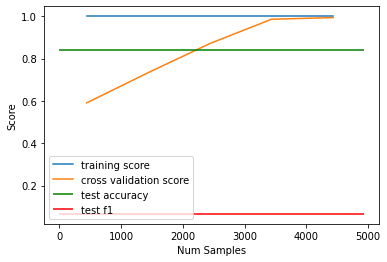

In [103]:
base = DecisionTreeClassifier(max_depth=10)
model = AdaBoostClassifier(base_estimator=base, n_estimators=5000)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, X_train, y_train, cv=10,return_times=True, n_jobs=6)

plt.plot(train_sizes,np.mean(train_scores,axis=1), label="training score")
plt.plot(train_sizes,np.mean(test_scores,axis=1), label="cross validation score")
plt.xlabel("Num Samples")
plt.ylabel("Score")

model.fit(X_train, y_train)
t = perf_counter()
y_pred = model.predict(X_test)
print(perf_counter()-t)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))
plt.hlines(y=metrics.accuracy_score(y_test, y_pred), color='green', xmin=0, xmax = len(X_train), label="test accuracy")
plt.hlines(y=metrics.f1_score(y_test, y_pred), color='red', xmin=0, xmax = len(X_train), label="test f1")
# plt.plot(y_pred, label="cross validation score")
plt.legend(loc="best")

Accuracy: 0.839516129032258
Precision: 0.4666666666666667
f1: 0.06572769953051642
1.456640416989103


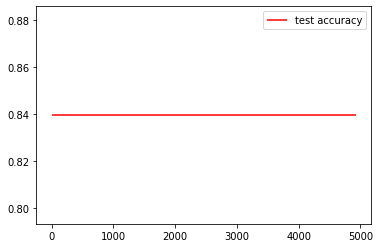

In [373]:

t = perf_counter()
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))
plt.hlines(y=metrics.accuracy_score(y_test, y_pred), color='red', xmin=0, xmax = len(X_train), label="test accuracy")
# plt.plot(y_pred, label="cross validation score")
plt.legend(loc="best")
print(perf_counter()-t)

In [96]:
'''
  _____   ___ __ ___  
 / __\ \ / / '_ ` _ \ 
 \__ \\ V /| | | | | |
 |___/ \_/ |_| |_| |_|
                      
                      
'''
from sklearn.svm import SVC
X_train, y_train, X_test, y_test = framingham_data.load(oversample=True, verbose=True, scale=True, scale_type="standard")

scaling with standard scaler
Loading 4133 rows
split: Train:  2893 2893 Test:  1240 1240
after resample
split: Train:  4926 4926 Test:  1240 1240


In [375]:
scores = []
SCORE_TYPE = ["accuracy"]
KERNELS = ['linear','poly', 'rbf','sigmoid']
for k in KERNELS:
    svm = SVC(kernel=k)

    scores.append({
        "label":f'kernel_{k}',
        "scores":{},
        "times":{}
    })
    for s in SCORE_TYPE:
        t = perf_counter()
        scores[-1]["scores"][s] = sum(cross_val_score(svm, X_train, y_train, scoring=s, cv=10, n_jobs=6))/10
        scores[-1]["times"][s] = perf_counter() - t

In [376]:
svm_scores= scores
print(best_score(svm_scores, SCORE_TYPE))
svm_scores

{'accuracy': {'label': 'kernel_rbf', 'score': 0.7257420966704596}}


[{'label': 'kernel_linear',
  'scores': {'accuracy': 0.681486749451673},
  'times': {'accuracy': 2.767400473007001}},
 {'label': 'kernel_poly',
  'scores': {'accuracy': 0.7139773907881067},
  'times': {'accuracy': 2.170964222983457}},
 {'label': 'kernel_rbf',
  'scores': {'accuracy': 0.7257420966704596},
  'times': {'accuracy': 1.8006002759793773}},
 {'label': 'kernel_sigmoid',
  'scores': {'accuracy': 0.5783691188838866},
  'times': {'accuracy': 1.3572153950226493}}]

In [377]:
scores = []
SCORE_TYPE = ["accuracy"]
KERNELS = ['rbf']
divs = [ 1,10,100,1000,10000]
for i in divs:
    for k in KERNELS:
        svm = SVC(kernel=k, gamma=1/i)
  
        scores.append({
            "label":f'kernel_{k}_gamma_{1/i}',
            "scores":{},
            "times":{}
        })
        for s in SCORE_TYPE:
            t = perf_counter()
            scores[-1]["scores"][s] = sum(cross_val_score(svm, X_train, y_train, scoring=s, cv=6, n_jobs=6))/6
            scores[-1]["times"][s] = perf_counter() - t

In [378]:
svm_scores= scores
print(best_score(svm_scores, SCORE_TYPE))
svm_scores

{'accuracy': {'label': 'kernel_rbf_gamma_1.0', 'score': 0.976045473000406}}


[{'label': 'kernel_rbf_gamma_1.0',
  'scores': {'accuracy': 0.976045473000406},
  'times': {'accuracy': 0.889703037973959}},
 {'label': 'kernel_rbf_gamma_0.1',
  'scores': {'accuracy': 0.728380024360536},
  'times': {'accuracy': 0.9574261130183004}},
 {'label': 'kernel_rbf_gamma_0.01',
  'scores': {'accuracy': 0.6847340641494113},
  'times': {'accuracy': 0.8264416010351852}},
 {'label': 'kernel_rbf_gamma_0.001',
  'scores': {'accuracy': 0.6798619569630532},
  'times': {'accuracy': 0.872787571977824}},
 {'label': 'kernel_rbf_gamma_0.0001',
  'scores': {'accuracy': 0.6579374746244416},
  'times': {'accuracy': 0.9716268859920092}}]

Accuracy: 0.817741935483871
Recall: 0.04040404040404041
Precision: 0.18181818181818182
f1: 0.06611570247933884
f1: 0.06611570247933884
0.1517388439970091


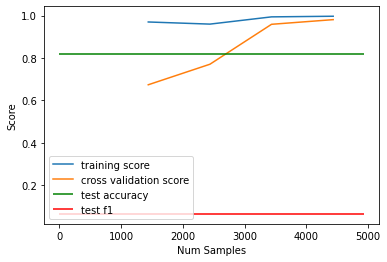

In [104]:
model = SVC(kernel="rbf", gamma = 1)
model.fit(X_train, y_train)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, X_train, y_train, cv=10,return_times=True, n_jobs=6)

plt.plot(train_sizes,np.mean(train_scores,axis=1), label="training score")
plt.plot(train_sizes,np.mean(test_scores,axis=1), label="cross validation score")
plt.xlabel("Num Samples")
plt.ylabel("Score")


model.fit(X_train, y_train)
t = perf_counter()
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))
plt.hlines(y=metrics.accuracy_score(y_test, y_pred), color='green', xmin=0, xmax = len(X_train), label="test accuracy")
plt.hlines(y=metrics.f1_score(y_test, y_pred), color='red', xmin=0, xmax = len(X_train), label="test f1")
plt.legend(loc="best")
print(perf_counter()-t)

In [150]:
svm = SVC(kernel="poly", degree=30)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))


Accuracy: 0.7758064516129032
Precision: 0.2826086956521739
f1: 0.27225130890052357


In [99]:
'''
  _                
 | |               
 | | ___ __  _ __  
 | |/ / '_ \| '_ \ 
 |   <| | | | | | |
 |_|\_\_| |_|_| |_|
                   
                   
'''

from sklearn.neighbors import KNeighborsClassifier
X_train, y_train, X_test, y_test = framingham_data.load(oversample=True, verbose=True, scale=True, scale_type="standard")

scaling with standard scaler
Loading 4133 rows
split: Train:  2893 2893 Test:  1240 1240
after resample
split: Train:  4926 4926 Test:  1240 1240


In [398]:
scores = []
SCORE_TYPE = ["accuracy"]
for i in range(2, 20, 1):
    knn = KNeighborsClassifier(n_neighbors=i)

    scores.append({
        "label":f'knn_k_{i}',
        "scores":{},
        "times":{}
    })
    for s in SCORE_TYPE:
        t = perf_counter()
        scores[-1]["scores"][s] = sum(cross_val_score(knn, X_train, y_train, scoring=s, cv=10, n_jobs=6))/10
        scores[-1]["times"][s] = perf_counter() - t






In [399]:
knn_k_scores= scores
print(best_score(knn_k_scores, SCORE_TYPE))
knn_k_scores

{'accuracy': {'label': 'knn_k_2', 'score': 0.9263019673807286}}


[{'label': 'knn_k_2',
  'scores': {'accuracy': 0.9263019673807286},
  'times': {'accuracy': 0.09917218901682645}},
 {'label': 'knn_k_3',
  'scores': {'accuracy': 0.8751414106433153},
  'times': {'accuracy': 0.09703264606650919}},
 {'label': 'knn_k_4',
  'scores': {'accuracy': 0.8656013456686292},
  'times': {'accuracy': 0.10264349507633597}},
 {'label': 'knn_k_5',
  'scores': {'accuracy': 0.8260183215422418},
  'times': {'accuracy': 0.1157169439829886}},
 {'label': 'knn_k_6',
  'scores': {'accuracy': 0.8012582661323572},
  'times': {'accuracy': 0.1173446390312165}},
 {'label': 'knn_k_7',
  'scores': {'accuracy': 0.7777115387786737},
  'times': {'accuracy': 0.12556077691260725}},
 {'label': 'knn_k_8',
  'scores': {'accuracy': 0.7687787562459804},
  'times': {'accuracy': 0.14667017594911158}},
 {'label': 'knn_k_9',
  'scores': {'accuracy': 0.7541639868731345},
  'times': {'accuracy': 0.13297808403149247}},
 {'label': 'knn_k_10',
  'scores': {'accuracy': 0.747660334108412},
  'times': {'a

In [196]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))


Accuracy: 0.771774193548387
Precision: 0.26256983240223464
f1: 0.24933687002652521


In [395]:
scores = []
SCORE_TYPE = ["accuracy"]
algos= ['auto','ball_tree','kd_tree','brute']
weights = ["uniform","distance"]
ps = [1,2]
for l in range(5,150,10):
# #     for a in weights:
# for a in ps:
    print(l)
    knn = KNeighborsClassifier(n_neighbors=1, leaf_size=l)

    scores.append({
        "label":f'knn_l_{l}',
        "scores":{},
        "times":{}
    })
    for s in SCORE_TYPE:
        t = perf_counter()
        scores[-1]["scores"][s] = sum(cross_val_score(knn, X_train, y_train, scoring=s, cv=10))/10
        scores[-1]["times"][s] = perf_counter() - t
knn_k_scores = scores
knn_k_scores= scores
print(best_score(knn_k_scores, SCORE_TYPE))
knn_k_scores

5
15
25
35
45
55
65
75
85
95
105
115
125
135
145
{'accuracy': {'label': 'knn_l_5', 'score': 0.9321900921848976}}


[{'label': 'knn_l_5',
  'scores': {'accuracy': 0.9321900921848976},
  'times': {'accuracy': 0.7580358440754935}},
 {'label': 'knn_l_15',
  'scores': {'accuracy': 0.9321900921848976},
  'times': {'accuracy': 0.5853207400068641}},
 {'label': 'knn_l_25',
  'scores': {'accuracy': 0.9321900921848976},
  'times': {'accuracy': 0.45832015306223184}},
 {'label': 'knn_l_35',
  'scores': {'accuracy': 0.9321900921848976},
  'times': {'accuracy': 0.5614012370351702}},
 {'label': 'knn_l_45',
  'scores': {'accuracy': 0.9321900921848976},
  'times': {'accuracy': 0.4433001659344882}},
 {'label': 'knn_l_55',
  'scores': {'accuracy': 0.9321900921848976},
  'times': {'accuracy': 0.4930506950477138}},
 {'label': 'knn_l_65',
  'scores': {'accuracy': 0.9321900921848976},
  'times': {'accuracy': 0.572938801953569}},
 {'label': 'knn_l_75',
  'scores': {'accuracy': 0.9321900921848976},
  'times': {'accuracy': 0.5841078120283782}},
 {'label': 'knn_l_85',
  'scores': {'accuracy': 0.9321900921848976},
  'times': {

Accuracy: 0.7725806451612903
Precision: 0.2558139534883721
f1: 0.23783783783783785
0.08980884694028646


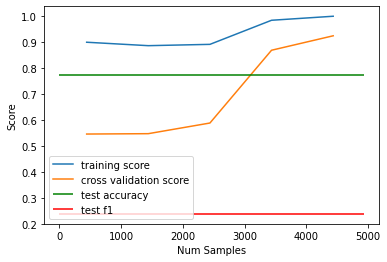

In [100]:
model = KNeighborsClassifier(n_neighbors=2)
# model.fit(X_train, y_train)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, X_train, y_train, cv=10,return_times=True, n_jobs=6)

plt.plot(train_sizes,np.mean(train_scores,axis=1), label="training score")
plt.plot(train_sizes,np.mean(test_scores,axis=1), label="cross validation score")
plt.xlabel("Num Samples")
plt.ylabel("Score")


model.fit(X_train, y_train)
t = perf_counter()
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))
plt.hlines(y=metrics.accuracy_score(y_test, y_pred), color='green', xmin=0, xmax = len(X_train), label="test accuracy")
plt.hlines(y=metrics.f1_score(y_test, y_pred), color='red', xmin=0, xmax = len(X_train), label="test f1")

plt.legend(loc="best")
print(perf_counter()-t)

In [112]:
'''
                             _            _                      _    
                            | |          | |                    | |   
  _ __   ___ _   _ _ __ __ _| |_ __   ___| |___      _____  _ __| | __
 | '_ \ / _ \ | | | '__/ _` | | '_ \ / _ \ __\ \ /\ / / _ \| '__| |/ /
 | | | |  __/ |_| | | | (_| | | | | |  __/ |_ \ V  V / (_) | |  |   < 
 |_| |_|\___|\__,_|_|  \__,_|_|_| |_|\___|\__| \_/\_/ \___/|_|  |_|\_\
                                                                      
                                                                      
'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
X_train, y_train, X_test, y_test = framingham_data.load(oversample=True, verbose=True, scale=True, scale_type="ss")
from tensorflow.keras.optimizers import Adam
def train_validate_fold(model, _X_train, _y_train, _X_val, _y_val, epochs=200):
    model.get_weights()
    print("training for ", epochs, "epochs")
    model.fit(_X_train, _y_train, epochs=epochs, verbose = 0)
    scores = model.evaluate(_X_val, _y_val, verbose=0)
    return scores


scaling with standard scaler
Loading 4133 rows
split: Train:  2893 2893 Test:  1240 1240
after resample
split: Train:  4926 4926 Test:  1240 1240


In [263]:
#you can see the val_acc and val loss are never able to get to a good place. maybe not enough capacity
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [259]:
history = model.fit(X_train, y_train, epochs=200, verbose=1, validation_split=0.2 )

Epoch 1/200
124/124 [==============================] - 1s 3ms/step - loss: 0.6904 - accuracy: 0.5591 - val_loss: 0.6162 - val_accuracy: 0.6440
Epoch 2/200
124/124 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.6873 - val_loss: 0.6401 - val_accuracy: 0.5152
Epoch 3/200
124/124 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.7000 - val_loss: 0.6623 - val_accuracy: 0.4696
Epoch 4/200
124/124 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7099 - val_loss: 0.6580 - val_accuracy: 0.4959
Epoch 5/200
124/124 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.7096 - val_loss: 0.6491 - val_accuracy: 0.5112
Epoch 6/200
124/124 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.7076 - val_loss: 0.6703 - val_accuracy: 0.4888
Epoch 7/200
124/124 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.7147 - val_loss: 0.6741 - val_accuracy: 0.5051

In [8]:

def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

In [311]:
scores = []
nodes_to_try = [8,16,32,64]
for n in nodes_to_try:
    print( " -- ", n ,"--")
    model = Sequential()
    model.add(Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(n, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    kfold.get_n_splits(X_train, y_train)
    average_scores = [0,0]
    i = 0
    runtime= perf_counter()
    for t, v in kfold.split(X_train, y_train):
        _scores = train_validate_fold(model, X_train.loc[t], y_train.loc[t], X_train.loc[v], y_train.loc[v], epochs=300)
        average_scores[0]+=_scores[0]
        average_scores[1]+=_scores[1]
        i+=1
    scores.append({
            "label":f'nn_n_{n}',
            "scores":[average_scores[0]/i, average_scores[1]/i],
            "times":(perf_counter() - runtime)/5
        })

 --  8 --
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs
 --  16 --
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs
 --  32 --
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs
 --  64 --
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs


In [312]:
print(scores)


[{'label': 'nn_n_8', 'scores': [0.5139356553554535, 0.7608663320541382], 'times': 31.644711472501513}, {'label': 'nn_n_16', 'scores': [0.40235650539398193, 0.8605446815490723], 'times': 31.634031138999852}, {'label': 'nn_n_32', 'scores': [0.1801611315459013, 0.9620467305183411], 'times': 31.14031546320184}, {'label': 'nn_n_64', 'scores': [0.1330405578482896, 0.9776800036430359], 'times': 31.143438562803205}]


In [320]:
layer_test_scores = [{'label': 'nn_n_8', 'scores': [0.5139356553554535, 0.7608663320541382], 'times': 31.644711472501513}, {'label': 'nn_n_16', 'scores': [0.40235650539398193, 0.8605446815490723], 'times': 31.634031138999852}, {'label': 'nn_n_32', 'scores': [0.1801611315459013, 0.9620467305183411], 'times': 31.14031546320184}, {'label': 'nn_n_64', 'scores': [0.1330405578482896, 0.9776800036430359], 'times': 31.143438562803205}]

In [319]:
# so from this, the best is 64 units which passes validation tests. 
#now lets alter the learning rate
scores = []
learning_rates = [.1, .01, .001, .0001]
for lr in learning_rates:
    print(" lr: ", lr)
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    kfold.get_n_splits(X_train, y_train)
    average_scores = [0,0]
    i = 0
    runtime= perf_counter()
    for t, v in kfold.split(X_train, y_train):
        _scores = train_validate_fold(model, X_train.loc[t], y_train.loc[t], X_train.loc[v], y_train.loc[v], epochs=300)
        average_scores[0]+=_scores[0]
        average_scores[1]+=_scores[1]
        i+=1
    scores.append({
            "label":f'nn_n_{n}',
            "scores":[average_scores[0]/i, average_scores[1]/i],
            "times":(perf_counter() - runtime)/5
        })

 lr:  0.1
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs
 lr:  0.01
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs
 lr:  0.001
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs
 lr:  0.0001
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs
training for  300 epochs


In [321]:
print(scores)


[{'label': 'nn_n_64', 'scores': [0.6358242988586426, 0.6660689115524292], 'times': 31.35074019980384}, {'label': 'nn_n_64', 'scores': [0.28136936128139495, 0.962655246257782], 'times': 35.21966895189835}, {'label': 'nn_n_64', 'scores': [0.10895282914862037, 0.9799135088920593], 'times': 31.399784614698728}, {'label': 'nn_n_64', 'scores': [0.18014469146728515, 0.9354631781578064], 'times': 31.429981636302546}]


In [39]:
#final nn 64,64 with lr of .01 (which is best)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
t = perf_counter()
history = model.fit(X_train, y_train, epochs=300, verbose=0,  validation_split=0.2 )
print("train time", perf_counter()-t)

train time 142.25617923401296


39/39 [==============================] - 0s 2ms/step - loss: 2.2137 - accuracy: 0.7702
[2.2137179374694824, 0.7701612710952759]
evaluation time 0.15531312196981162


<Figure size 576x432 with 0 Axes>

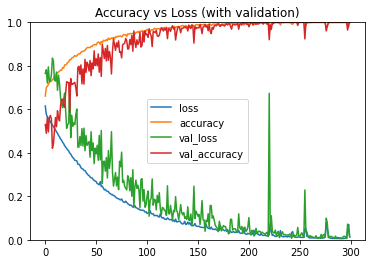

In [41]:
t = perf_counter()
plot_loss_accuracy(history)
y_train

print(model.evaluate(X_test, y_test))
print("evaluation time", perf_counter()-t)